Import packages for the code to work.

In [1]:
#!pip install prettytable
import requests
import json
import prettytable
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#https://www.bls.gov/developers/api_python.htm

Here we are designating the files we want to download to use. First step is understanding that the seriesID key is tied to the name of the files we want to download. Next we incldue the start and endyear for the data we want. All this information will be stored as the data variable, which will be included as part of our API request. The Json data will then be loaded as text as json_data variable. 

In [2]:
headers = {'Content-type': 'application/json'}
data = json.dumps({
    "seriesid": ['LNS14027659','LNS14027660','LNS14027689','LNS14027662'],
    "startyear": "2012",
    "endyear": "2022"
})

p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

print(json_data)

{'status': 'REQUEST_SUCCEEDED', 'responseTime': 703, 'message': ['Year range has been reduced to the system-allowed limit of 10 years.'], 'Results': {'series': [{'seriesID': 'LNS14027659', 'data': [{'year': '2021', 'period': 'M12', 'periodName': 'December', 'value': '5.3', 'footnotes': [{}]}, {'year': '2021', 'period': 'M11', 'periodName': 'November', 'value': '5.7', 'footnotes': [{}]}, {'year': '2021', 'period': 'M10', 'periodName': 'October', 'value': '7.1', 'footnotes': [{}]}, {'year': '2021', 'period': 'M09', 'periodName': 'September', 'value': '7.6', 'footnotes': [{}]}, {'year': '2021', 'period': 'M08', 'periodName': 'August', 'value': '7.7', 'footnotes': [{}]}, {'year': '2021', 'period': 'M07', 'periodName': 'July', 'value': '9.3', 'footnotes': [{}]}, {'year': '2021', 'period': 'M06', 'periodName': 'June', 'value': '10.3', 'footnotes': [{}]}, {'year': '2021', 'period': 'M05', 'periodName': 'May', 'value': '9.0', 'footnotes': [{}]}, {'year': '2021', 'period': 'M04', 'periodName': 

Here we are using a for loop to iterate though all the JSON file to gather our data and write it to a csv file. For every key value in a series we will assign it under the for item in series['data']: loop and write it to a CSV file. 

In [3]:
for series in json_data['Results']['series']:
    x = prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    csv_file_path = seriesId + '.csv'

    with open(csv_file_path, mode='w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(["series id", "year", "period", "value", "footnotes"])

        for item in series['data']:
            year = item['year']
            period = item['period']
            value = item['value']
            footnotes = ""
            for footnote in item['footnotes']:
                if footnote:
                    footnotes = footnotes + footnote['text'] + ','
            if 'M01' <= period <= 'M12':
                x.add_row([seriesId, year, period, value, footnotes[0:-1]])
                csv_writer.writerow([seriesId, year, period, value, footnotes[0:-1]])

    print(f'Data saved as {csv_file_path}')

Data saved as LNS14027659.csv
Data saved as LNS14027660.csv
Data saved as LNS14027689.csv
Data saved as LNS14027662.csv


Load the data into data frames and testing to make sure it worked. Test to make sure data loaded into data frame with no issue.

In [4]:
df1 = pd.read_csv("LNS14027659.csv") 
df2 = pd.read_csv("LNS14027660.csv") 
df3 = pd.read_csv("LNS14027689.csv") 
df4 = pd.read_csv("LNS14027662.csv") 

In [5]:
df1.head()

,series id,year,period,value,footnotes
0,LNS14027659,2021,M12,5.3,NaN
1,LNS14027659,2021,M11,5.7,NaN
2,LNS14027659,2021,M10,7.1,NaN
3,LNS14027659,2021,M09,7.6,NaN
4,LNS14027659,2021,M08,7.7,NaN


We are changing the values of 'series ID' to accurately reflect the values we are looking at. The for loop itterate through the first column assigning a new value. 

In [6]:
for i in range (len(df1)):
    df1.loc[i,'series id'] = '<HS Diploma'
for i in range (len(df2)):
    df2.loc[i,'series id'] = 'HS Diploma'
for i in range (len(df3)):
    df3.loc[i,'series id'] = 'Some College'
for i in range (len(df4)):
    df4.loc[i,'series id'] = 'Bach+'

Here we are combining the data into one data frame containing all the data from the four files we downlaoded. We are also dropping a column that we have no use for. We are also changing the name of the columns to better represent the data those columns hold

In [7]:
allData = pd.concat([df1, df2,df3,df4], axis=0)
allData = allData.drop('footnotes',axis=1)
allData.rename(columns = {'series id':'Education Level'}, inplace = True)
allData.rename(columns = {'value':'Unemployment Rate'}, inplace = True)

In [8]:
allData.head()

,Education Level,year,period,Unemployment Rate
0,<HS Diploma,2021,M12,5.3
1,<HS Diploma,2021,M11,5.7
2,<HS Diploma,2021,M10,7.1
3,<HS Diploma,2021,M09,7.6
4,<HS Diploma,2021,M08,7.7


We orginally wanted to create a means to know that our data was being sorted correctly by month and year, so we decided to create a new column holding both values as one.
The new column was named 'yearMonth' and we would iterate through the whole data frame getting the data we needed from each column converting it into string and back to a integer value.

In [9]:
allData['yearMonth'] = ""
allData['yearMonth']
for index, row in allData.iterrows():
    #print(row['year'], row['period'])
    rowMonth = row['period']
    rowYear = row['year']
    rowYear = str(rowYear)
    #print(rowYear, rowMonth)
    #df1['yearMonth'] = str(rowYear[2:]) + str(rowMonth[1:])
    a = str(rowYear[2:]) + str(rowMonth[1:])
    a = int(a)
    #print(a)
    allData.loc[index,'yearMonth'] = a

In [10]:
allData.head()

,Education Level,year,period,Unemployment Rate,yearMonth
0,<HS Diploma,2021,M12,5.3,2112
1,<HS Diploma,2021,M11,5.7,2111
2,<HS Diploma,2021,M10,7.1,2110
3,<HS Diploma,2021,M09,7.6,2109
4,<HS Diploma,2021,M08,7.7,2108


We then dropped the column we wanted to repalce 

In [11]:
#allData = allData.drop('year',axis=1)
allData = allData.drop('period',axis=1)


We wanted to save our dataframe and share it to each other, so we both could work from the same standard. We originally did our own individual data frames, names, and code to reach this point.

In [12]:
allData.to_csv('eduUnemp.csv')
a = allData['Unemployment Rate'].max()

We wanted to create histograms to show the range frequency of the low and high unempoyment rates for each education level over the years. The only major modification we did was using the .where() method to filter the data being used to generate the histograms and using the .xlim() method to standardize the look of our charts.

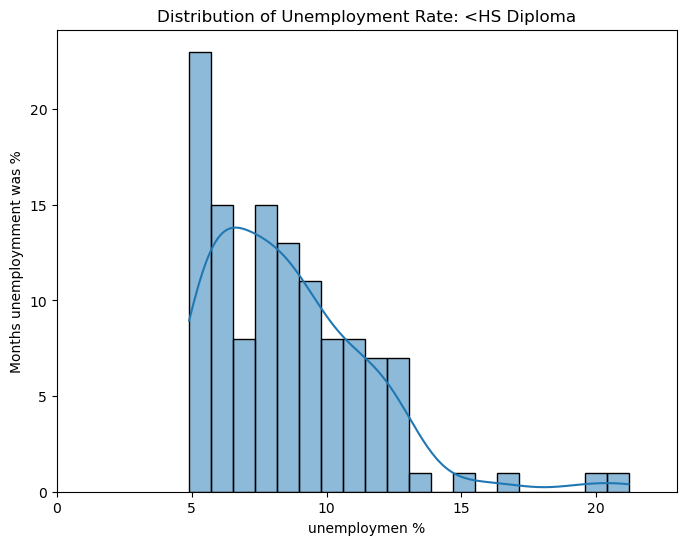

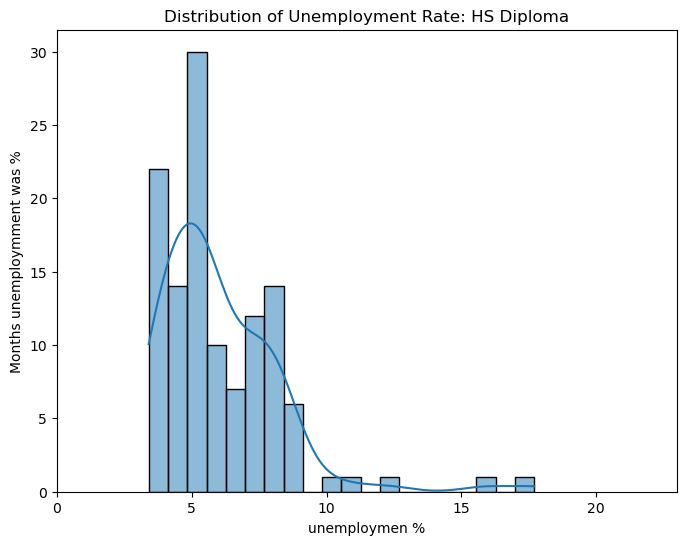

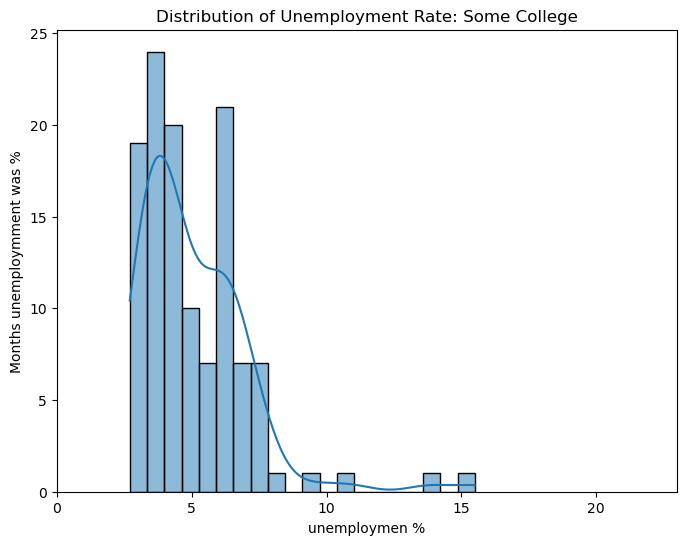

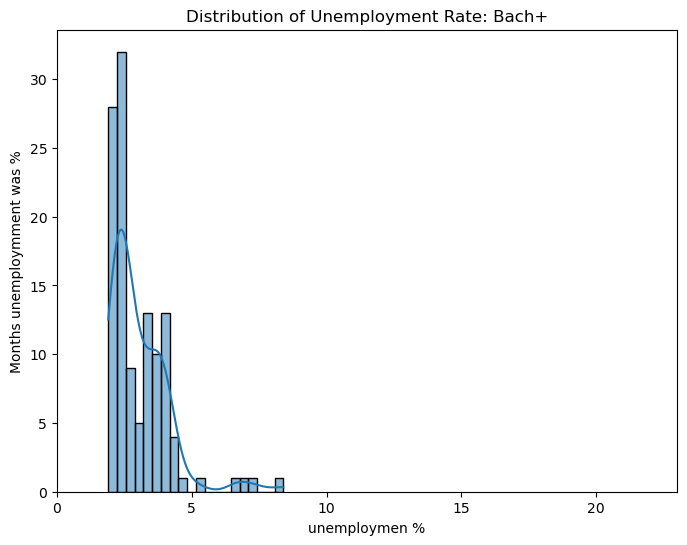

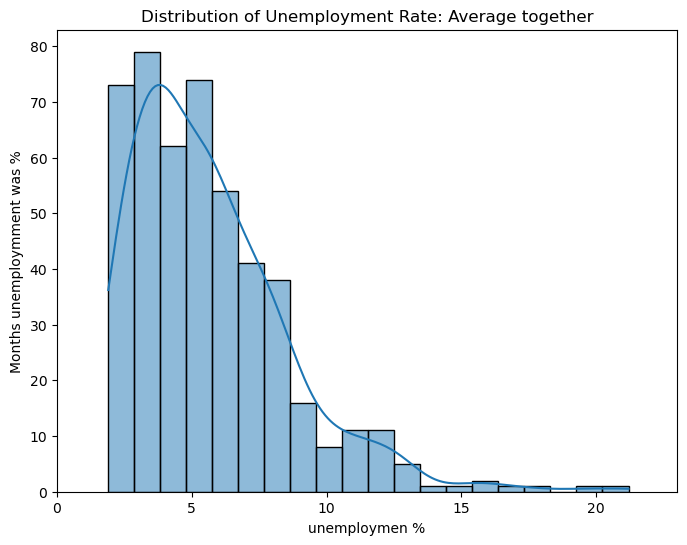

In [13]:
#HISTOGRAM
plt.figure(figsize=(8, 6))
sns.histplot(allData['Unemployment Rate'].where(allData['Education Level'] == '<HS Diploma') , bins=20, kde=True)
plt.xlabel('unemploymen %')
plt.ylabel('Months unemploymment was %')
plt.xlim(0,23)
plt.title('Distribution of Unemployment Rate: <HS Diploma')
plt.show()

#HISTOGRAM
plt.figure(figsize=(8, 6))
sns.histplot(allData['Unemployment Rate'].where(allData['Education Level'] == 'HS Diploma') , bins=20, kde=True)
plt.xlabel('unemploymen %')
plt.ylabel('Months unemploymment was %')
plt.xlim(0,23)
plt.title('Distribution of Unemployment Rate: HS Diploma')
plt.show()

#HISTOGRAM
plt.figure(figsize=(8, 6))
sns.histplot(allData['Unemployment Rate'].where(allData['Education Level'] == 'Some College') , bins=20, kde=True)
plt.xlabel('unemploymen %')
plt.ylabel('Months unemploymment was %')
plt.xlim(0,23)
plt.title('Distribution of Unemployment Rate: Some College')
plt.show()

#HISTOGRAM
plt.figure(figsize=(8, 6))
sns.histplot(allData['Unemployment Rate'].where(allData['Education Level'] == 'Bach+') , bins=20, kde=True)
plt.xlabel('unemploymen %')
plt.ylabel('Months unemploymment was %')
plt.xlim(0,23)
plt.title('Distribution of Unemployment Rate: Bach+')
plt.show()

#HISTOGRAM
plt.figure(figsize=(8, 6))
sns.histplot(allData['Unemployment Rate'] , bins=20, kde=True)
plt.xlabel('unemploymen %')
plt.ylabel('Months unemploymment was %')
plt.xlim(0,23)
plt.title('Distribution of Unemployment Rate: Average together')
plt.show()

Below we used bar plots to display the unemployment rate across the years for each Education Level. We used the .where() method again to filter the data by Education Level

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


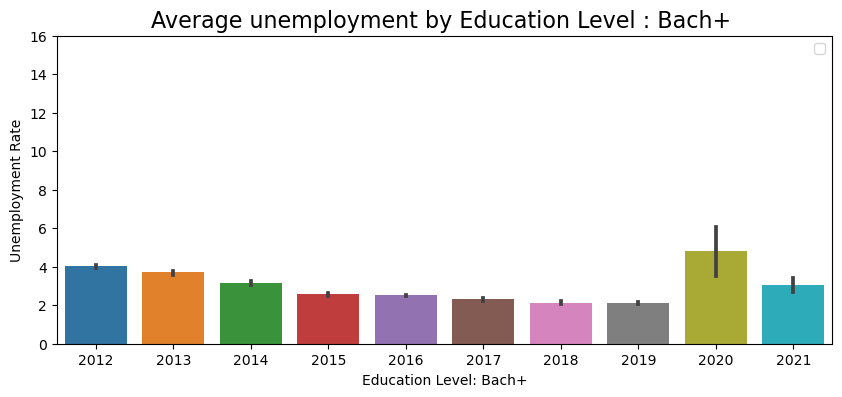

In [14]:
plt.figure(figsize = (10,4))
sns.barplot(y = allData['Unemployment Rate'].where(allData['Education Level'] == 'Bach+'), x = 'year', data = allData)
plt.title('Average unemployment by Education Level : Bach+ ', fontsize = 16)
plt.xlabel('Education Level: Bach+' )
plt.ylabel('Unemployment Rate')
plt.ylim(0,16)

plt.ticklabel_format(axis = 'y',style = 'plain' )
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


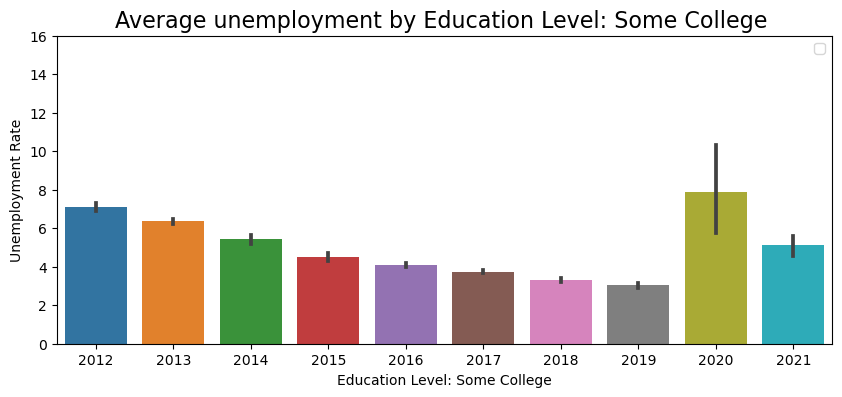

In [15]:
plt.figure(figsize = (10,4))
sns.barplot(y = allData['Unemployment Rate'].where(allData['Education Level'] == 'Some College'), x = 'year', data = allData)
plt.title('Average unemployment by Education Level: Some College ', fontsize = 16)
plt.xlabel('Education Level: Some College' )
plt.ylabel('Unemployment Rate')
plt.ylim(0,16)

plt.ticklabel_format(axis = 'y',style = 'plain' )
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


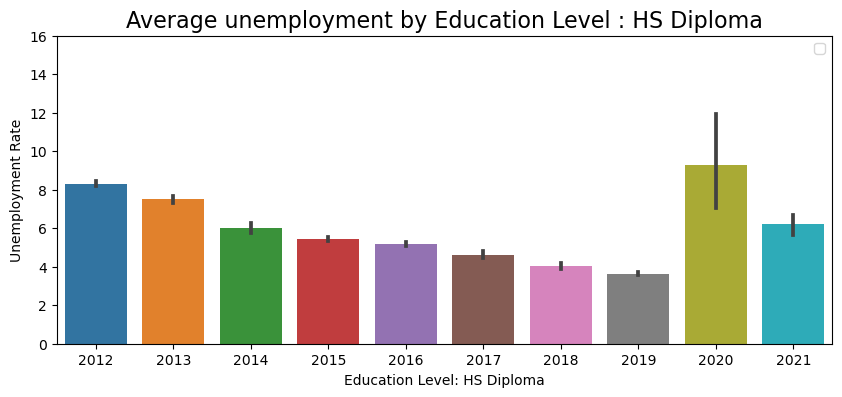

In [16]:
plt.figure(figsize = (10,4))
sns.barplot(y = allData['Unemployment Rate'].where(allData['Education Level'] == 'HS Diploma'), x = 'year', data = allData)
plt.title('Average unemployment by Education Level : HS Diploma' , fontsize = 16)
plt.xlabel('Education Level: HS Diploma' )
plt.ylabel('Unemployment Rate')
plt.ylim(0,16)

plt.ticklabel_format(axis = 'y',style = 'plain' )
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


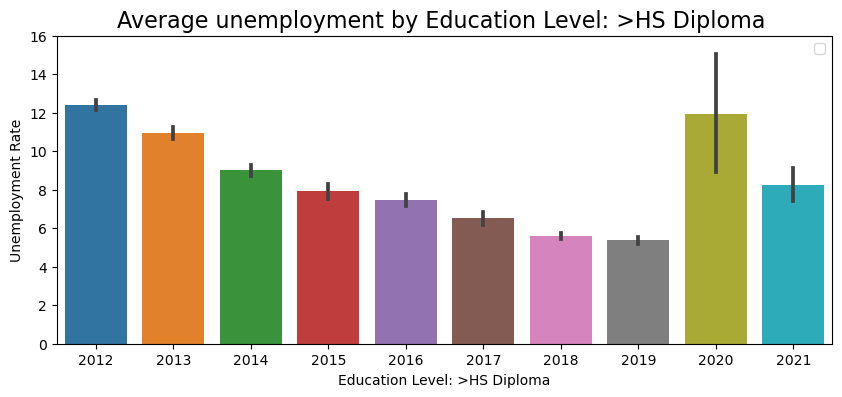

In [17]:
plt.figure(figsize = (10,4))
sns.barplot(y = allData['Unemployment Rate'].where(allData['Education Level'] == '<HS Diploma'), x = 'year', data = allData)
plt.title('Average unemployment by Education Level: >HS Diploma ', fontsize = 16)
plt.xlabel('Education Level: >HS Diploma' )
plt.ylim(0,16)
plt.ylabel('Unemployment Rate')
plt.ticklabel_format(axis = 'y',style = 'plain' )
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


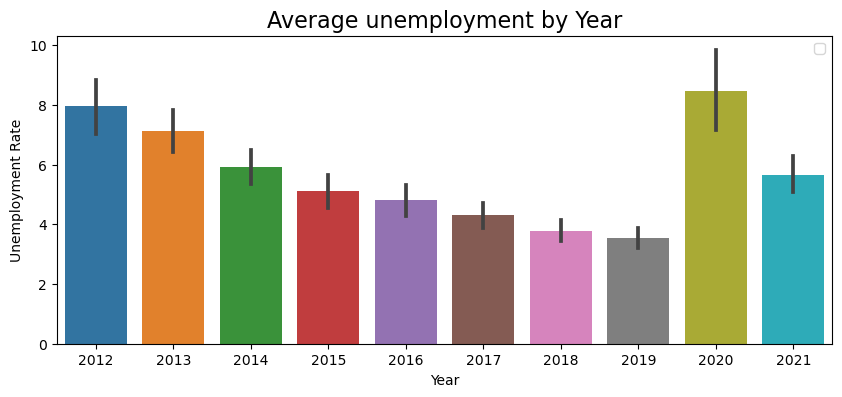

In [18]:
plt.figure(figsize = (10,4))
sns.barplot(x = 'year', y = 'Unemployment Rate', data = allData)
plt.title('Average unemployment by Year', fontsize = 16)
plt.xlabel('Year' )
plt.ylabel('Unemployment Rate')
plt.ticklabel_format(axis = 'y',style = 'plain' )
plt.legend()

Here we are using a function that takes 4 arguments to display a line plot of the unemployment rates over the years by education level. The first is our data frame, a list containing our different education levels, y which column's value we want to use, and x which is to properly title our chart.

In [19]:
eduList = ['<HS Diploma','HS Diploma','Some College','Bach+']
def linePlotEdu(payData,eduList,y, x):
    plt.figure(figsize = (10,10))
    eduLevel = payData[(payData['Education Level'].isin(eduList))]
    # Filter the data for the specific country
    sns.set_style('whitegrid')
    sns.set_theme(font_scale = 1.5)
    # Create a line plot for the happiness score over the years
    sns.lineplot(x='year', y=y, data=payData, hue='Education Level',linewidth=2,palette= 'turbo').set(title=f'{x} by year based on {eduList}')
    plt.show()

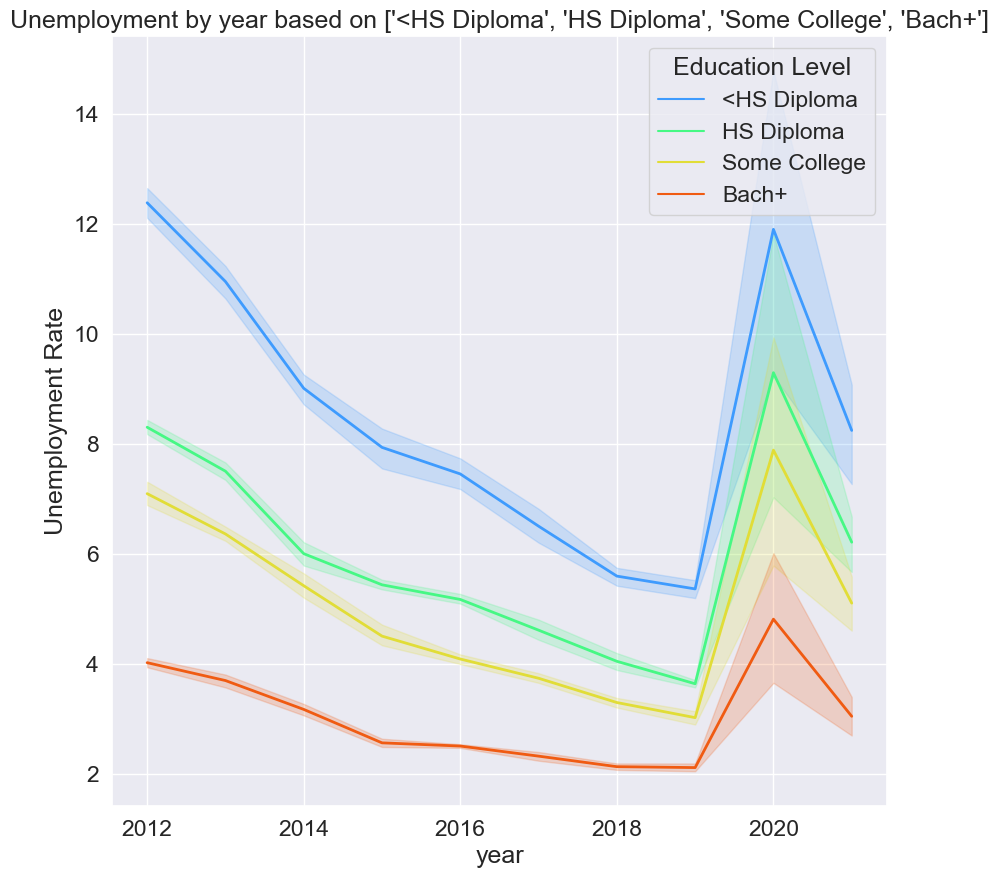

In [20]:
linePlotEdu(allData,eduList,'Unemployment Rate','Unemployment')